# Sales Performance Analysis

# Objective
The objective of this project is to analyze retail sales data to identify sales trends over time, performance across product categories and regions, and key customer insights using Python and data analysis techniques.

In [2]:
# import dependancies
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load Dataset
df = pd.read_excel(
    "../data/Sample Superstore Practice.xlsx",
    engine="openpyxl"
)
# Load first 5 rows of the dataset
df.head()


,Order ID,Order Date,Ship Date,Unnamed: 3,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,CA-2016-152156,2016-08-11 00:00:00,2016-11-11 00:00:00,NaN,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,CA-2016-152156,2016-08-11 00:00:00,2016-11-11 00:00:00,NaN,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,CA-2016-138688,2016-12-06 00:00:00,6/16/2016,NaN,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,US-2015-108966,2015-11-10 00:00:00,10/18/2015,NaN,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,US-2015-108966,2015-11-10 00:00:00,10/18/2015,NaN,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [4]:
# Data overview
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       9994 non-null   object 
 1   Order Date     9994 non-null   object 
 2   Ship Date      9994 non-null   object 
 3   Unnamed: 3     0 non-null      float64
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [5]:
# Statistical summary of the dataset
df.describe()

,Unnamed: 3,Postal Code,Sales,Quantity,Discount,Profit
count,0.0,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,NaN,55190.379428,229.858001,3.789574,0.156203,28.656896
std,NaN,32063.693350,623.245101,2.225110,0.206452,234.260108
min,NaN,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,NaN,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,NaN,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,NaN,90008.000000,209.940000,5.000000,0.200000,29.364000
max,NaN,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [6]:
# Data Cleaning
# Removes unnecessry unnamed columns
df = df.drop(columns=["Unnamed: 3"])

# Convert date columns to datetime
df["Order Date"] = pd.to_datetime(df["Order Date"])
df["Ship Date"] = pd.to_datetime(df["Ship Date"])

df.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,CA-2016-152156,2016-08-11,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,CA-2016-152156,2016-08-11,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,CA-2016-138688,2016-12-06,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,US-2015-108966,2015-11-10,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,US-2015-108966,2015-11-10,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


## Data Cleaning
An unnamed column with no analytical value was removed.
Order date and ship date were converted to datetime format to enable time-based analysis.

In [7]:
# Create Yeat-Month column
df["YearMonth"] = df["Order Date"].dt.to_period("M")

# Aggregate monthly sales
monthly_sales = df.groupby("YearMonth")["Sales"].sum()

monthly_sales.head()

YearMonth
2014-01    28953.706
2014-02    12743.108
2014-03    54801.906
2014-04    24710.016
2014-05    29639.834
Freq: M, Name: Sales, dtype: float64

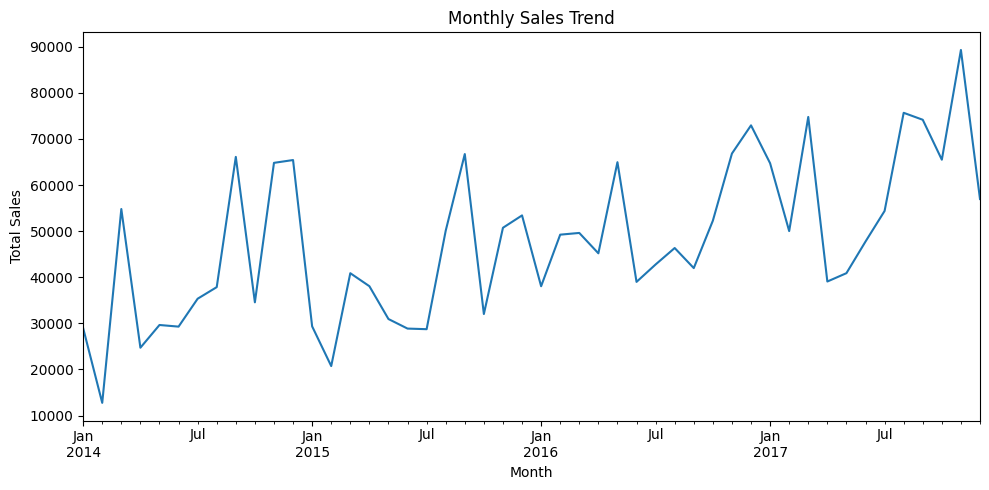

In [8]:
# Monthly Sales Trend chart
monthly_sales.plot(figsize=(10,5))
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.tight_layout()
plt.show()

## Monthly Sales Trend
The chart shows how total sale fluctuate over time, highlighting periods of higher and lower sales activity that may indicate seasonal or demand-related patterns.

In [9]:
# Sales by Category
sales_by_category = (
    df.groupby("Category")["Sales"].sum().sort_values(ascending=False)
)
sales_by_category

Category
Technology         836154.0330
Furniture          741999.7953
Office Supplies    719047.0320
Name: Sales, dtype: float64

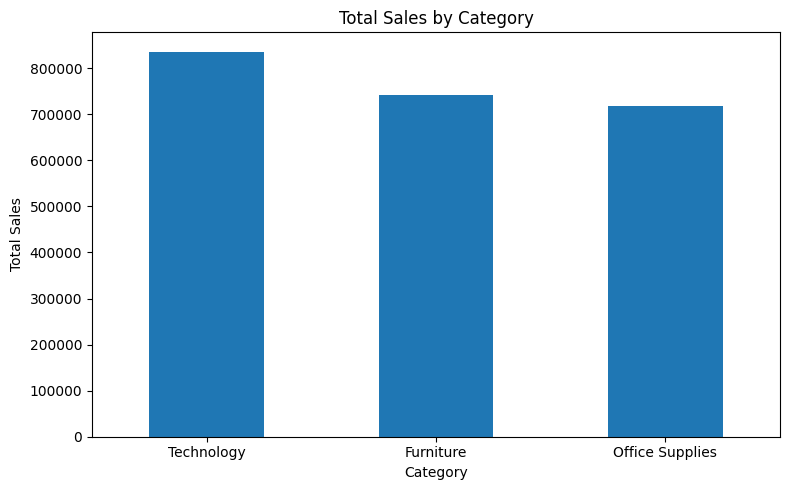

In [10]:
# Category chart
sales_by_category.plot(kind="bar", figsize=(8,5))
plt.title("Total Sales by Category")
plt.xlabel("Category")
plt.ylabel("Total Sales")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

## Sales by Category
Sales contribution vary across product categories, helping identify which categoris are the strongest drivers of revenue.

In [11]:
# Sales by region
sales_by_region = (
    df.groupby("Region")["Sales"].sum().sort_values(ascending=False)
)
sales_by_region

Region
West       725457.8245
East       678781.2400
Central    501239.8908
South      391721.9050
Name: Sales, dtype: float64

## Regional Performance
Sales performance differs across regions, indicating variations in customer demand by geographic area.

In [12]:
# Top ten customers
top_customers = ( 
    df.groupby("Customer Name")["Sales"].sum().sort_values(ascending=False).head(10)
)
top_customers

Customer Name
Sean Miller           25043.050
Tamara Chand          19052.218
Raymond Buch          15117.339
Tom Ashbrook          14595.620
Adrian Barton         14473.571
Ken Lonsdale          14175.229
Sanjit Chand          14142.334
Hunter Lopez          12873.298
Sanjit Engle          12209.438
Christopher Conant    12129.072
Name: Sales, dtype: float64

## Top Customers
A small number of customer account for a significant portion of total sales, hughlighting the importance of key customer relationships.

In [14]:
# Profit by category
profit_by_category = (
    df.groupby("Category")["Profit"].sum().sort_values(ascending=False)
)
profit_by_category

Category
Technology         145454.9481
Office Supplies    122490.8008
Furniture           18451.2728
Name: Profit, dtype: float64

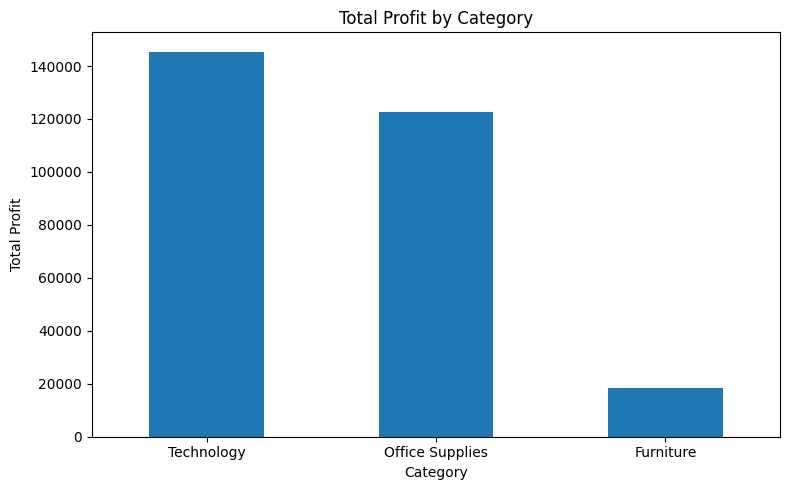

In [15]:
# Profit chart
profit_by_category.plot(kind="bar", figsize=(8,5))
plt.title("Total Profit by Category")
plt.xlabel("Category")
plt.ylabel("Total Profit")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

## Profit Analysis
Profitability varies by product category, demonstrating that high sales volumns do not always correspond to high profits.

## Conclusion
This analysis explored sales trends over time, category and regional performance, customer contributions, and profitability. The results demonstrate how structured data analysis and visualisations can support data-driven business decision-making.